## Notebook: Basic text preprocessing and analysis

This notebook introduces basic techniques for text preprocessing, token frequency analysis, and vectorization for policy-relevant text data.

We'll walk through:

- Preprocessing and cleaning
- Tokenization and frequency analysis
- Vectorization: TF and TF-IDF
- Phrase extraction

We will use a dataset of abstracts related to public policy and NLP for the analysis.

### Import relevant libraries

In [1]:
import os
import pandas as pd

### Load the dataset

In [2]:
#path = r'/Users/nihitgoyal/surfdrive/teaching/NLP for public policy/' 
#os.chdir(path)

df = pd.read_csv("../data/merged_scopus.csv")

### Combine Title and Abstract

In [3]:
valid_types = ['Article', 'Book', 'Book chapter', 'Review']
df = df[df['Document Type'].isin(valid_types)]

In [4]:
df['text'] = df['Title'].fillna('') + ' ' + df['Abstract'].fillna('')


#Preview
print(df[['Title', 'Abstract']].head())

pd.set_option('display.max_colwidth', 200)
print(df[['text']].head())

                                                Title  \
0   Unveiling sustainable tourism themes with mach...   
15  Investigating the higher education institution...   
17  Integrating sustainability into cybersecurity:...   
18  DrugGen enhances drug discovery with large lan...   
20  Neural topic modeling reveals German televisio...   

                                             Abstract  
0   This study explores the intersection of sustai...  
15  This study examined the guidelines issued by t...  
17  The increasing emphasis on sustainability in c...  
18  Traditional drug design faces significant chal...  
20  The implementation and acceptance of climate p...  
                                                                                                                                                                                                       text
0   Unveiling sustainable tourism themes with machine learning based topic modeling This study explores the intersect

### Examine basic statistics

In [5]:
print(f"Number of documents: {len(df)}")

df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print("Average word count per document:", df['word_count'].mean())

Number of documents: 5039
Average word count per document: 242.6995435602302


### Extract frequently occuring terms

In [6]:
from collections import Counter

all_words = ' '.join(df['text']).split()
word_counts = Counter(all_words)
most_common = word_counts.most_common(10)

print("Top 10 most frequent terms:")
for word, freq in most_common:
    print(f"{word}: {freq}")

Top 10 most frequent terms:
the: 59311
and: 50528
of: 44340
to: 28949
in: 23285
a: 17341
for: 12398
on: 11575
The: 10644
that: 8377


### Clean the text

In [7]:
import re

#Lowercase
cleaned = df['text'].str.lower()

#Replace non-alphanumeric characters with space
cleaned = cleaned.str.replace(r'[^a-z\s]', ' ', regex=True)

#Remove single-letter words
cleaned = cleaned.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

#Collapse multiple spaces and strip
cleaned = cleaned.str.replace(r'\s+', ' ', regex=True).str.strip()

#Save cleaned column
df['clean_text'] = cleaned
df['clean_text'].head()

0     unveiling sustainable tourism themes with machine learning based topic modeling this study explores the intersection of sustainable and green tourism with united nations sustainable development go...
15    investigating the higher education institutions guidelines and policies regarding the use of generative ai in teaching learning research and administration this study examined the guidelines issue...
17    integrating sustainability into cybersecurity insights from machine learning based topic modeling the increasing emphasis on sustainability in computing systems ranging from small devices to large...
18    druggen enhances drug discovery with large language models and reinforcement learning traditional drug design faces significant challenges due to inherent chemical and biological complexities ofte...
20    neural topic modeling reveals german television climate change coverage the implementation and acceptance of climate policies depend on public perceptions of climate chan

### Remove stop words

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#Add custom stopwords
custom_stopwords = set(ENGLISH_STOP_WORDS).union({"study", "analysis", "research"})

# Remove stopwords
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in custom_stopwords])

df['clean_text'] = df['clean_text'].apply(remove_stopwords)
df['clean_text'].head()

0     unveiling sustainable tourism themes machine learning based topic modeling explores intersection sustainable green tourism united nations sustainable development goals sdgs identifying key themes ...
15    investigating higher education institutions guidelines policies regarding use generative ai teaching learning administration examined guidelines issued universities regarding use generative ai gen...
17    integrating sustainability cybersecurity insights machine learning based topic modeling increasing emphasis sustainability computing systems ranging small devices large data centers fueled environ...
18    druggen enhances drug discovery large language models reinforcement learning traditional drug design faces significant challenges inherent chemical biological complexities resulting high failure r...
20    neural topic modeling reveals german television climate change coverage implementation acceptance climate policies depend public perceptions climate change media play cru

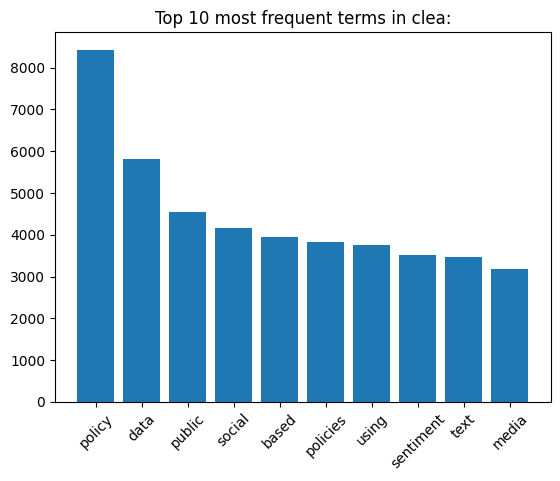

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

all_cleaned_words = ' '.join(df['clean_text']).split()
cleaned_freq = Counter(all_cleaned_words)

# Plot
words, counts = zip(*cleaned_freq.most_common(10))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 10 most frequent terms in clea:")
plt.show()

### Use Countvectorizer to count terms

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

manual_vectorizer = CountVectorizer()
X_manual = manual_vectorizer.fit_transform(df['clean_text'])

dtm_manual = pd.DataFrame(X_manual.toarray(), columns=manual_vectorizer.get_feature_names_out())
dtm_manual.head()

,aa,aachen,aadt,aagr,aapi,aaq,aarhus,aaron,aase,aat,...,zu,zuckerberg,zuiderent,zuloaga,zuo,zur,zwi,zwischen,zwolle,zycia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
term_sums = dtm_manual.sum(axis=0).sort_values(ascending=False)
top_terms = term_sums.head(10).index.tolist()

subset_dtm = dtm_manual[top_terms]
non_empty_rows = subset_dtm[(subset_dtm > 0).any(axis=1)].head(5)
non_empty_rows

,policy,data,public,social,based,policies,using,sentiment,text,media
0,2,2,0,1,2,0,1,0,0,0
1,0,0,0,0,0,3,0,2,0,1
2,2,1,0,0,2,0,1,0,0,0
3,1,0,0,0,2,0,1,0,0,0
4,1,0,2,0,1,1,0,0,0,1


In [12]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['text'])
dtm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

term_sums = dtm.sum(axis=0).sort_values(ascending=False)
top_terms = term_sums.head(10).index.tolist()

subset_dtm = dtm[top_terms]
non_empty_rows = subset_dtm[(subset_dtm > 0).any(axis=1)].head(5)
non_empty_rows

,policy,analysis,data,research,study,public,social,based,policies,using
0,2,0,2,1,2,0,1,2,0,1
1,0,5,0,2,2,0,0,0,3,0
2,2,1,1,1,3,0,0,2,0,1
3,1,0,0,1,0,0,0,2,0,1
4,1,0,0,1,0,2,0,1,1,0


### Using tf-idf

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

term_sums = tfidf_df.sum(axis=0).sort_values(ascending=False)
top_terms = term_sums.head(10).index.tolist()

subset_tfidf = tfidf_df[top_terms]
non_empty_rows = subset_tfidf[(subset_tfidf > 0).any(axis=1)].head(5)
non_empty_rows

,policy,analysis,data,public,research,sentiment,social,ai,study,media
0,0.024619,0.000000,0.031231,0.000000,0.016013,0.00000,0.0189,0.000000,0.028838,0.000000
1,0.000000,0.091604,0.000000,0.000000,0.044054,0.06095,0.0000,0.078470,0.039668,0.029741
2,0.025930,0.014028,0.016447,0.000000,0.016866,0.00000,0.0000,0.120167,0.045560,0.000000
3,0.010560,0.000000,0.000000,0.000000,0.013738,0.00000,0.0000,0.000000,0.000000,0.000000
4,0.020788,0.000000,0.000000,0.065749,0.027043,0.00000,0.0000,0.000000,0.000000,0.036513


### Working with phrases (or n-grams)

In [14]:
from keyphrase_vectorizers import KeyphraseCountVectorizer

kp_vectorizer = KeyphraseCountVectorizer()
kp_matrix = kp_vectorizer.fit_transform(df['text'])
kp_df = pd.DataFrame(kp_matrix.toarray(), columns=kp_vectorizer.get_feature_names_out())

# Get total keyphrase frequencies
kp_sums = kp_df.sum(axis=0).sort_values(ascending=False)

# Pick top keyphrases for display
top_kps = kp_sums.head(10).index.tolist()

# Get small, non-empty subset
subset_kp = kp_df[top_kps]
non_empty_rows = subset_kp[(subset_kp > 0).any(axis=1)].head(10)

# Display
print("Sample keyphrase DTM:")
non_empty_rows

/Users/esalasgirones/Documents/work/courses/nlp_icpp/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

### Distribution of n-grams

In [ ]:
# Get all feature names from the fitted vectorizer
features = kp_vectorizer.get_feature_names_out()

# Count how many words in each feature
ngram_lengths = [len(feat.split()) for feat in features]

# Count frequency of each n-gram length
from collections import Counter
ngram_stats = Counter(ngram_lengths)

# Print summary
print("N-gram distribution:")
for n, count in sorted(ngram_stats.items()):
    print(f"{n}-gram: {count} features")

N-gram distribution:
1-gram: 13450 features
2-gram: 57553 features
3-gram: 25079 features
4-gram: 6575 features
5-gram: 1574 features
6-gram: 375 features
7-gram: 105 features
8-gram: 30 features


### N-grams in the dataset

In [ ]:
from collections import defaultdict

# Group features by their n-gram length
features = kp_vectorizer.get_feature_names_out()
ngrams_by_length = defaultdict(list)

for feat in features:
    n = len(feat.split())
    ngrams_by_length[n].append(feat)

# Display examples for each n-gram length
for n in range(1, 6):  # limit to 1–5-grams
    examples = ngrams_by_length[n][:5]  # show first 5 examples
    print(f"\nExamples of {n}-grams:")
    for phrase in examples:
        print(f"  • {phrase}")


Examples of 1-grams:
  • alternatives
  • mining
  • rag
  • acute
  • industry

Examples of 2-grams:
  • tobit regression
  • strategic information
  • prestigious topics
  • risky behaviors
  • external stimuli

Examples of 3-grams:
  • innovation policy making
  • event study design
  • social media purpose
  • sustainable transportation solutions
  • quality data system

Examples of 4-grams:
  • multi - dimensional scaling
  • generative large language models
  • carbon trading price series
  • cadastral resurvey news articles
  • - scooter rider needs

Examples of 5-grams:
  • formidable natural language processing approach
  • national social science fund programs
  • finding programmatic policies encoding policies
  • post - disaster discourse dynamics
  • non - local price premium


### TF-IDF with n-grams

In [ ]:
from keyphrase_vectorizers import KeyphraseTfidfVectorizer

kp_vectorizer = KeyphraseTfidfVectorizer()
kp_matrix = kp_vectorizer.fit_transform(df['text'])
kp_df = pd.DataFrame(kp_matrix.toarray(), columns=kp_vectorizer.get_feature_names_out())

# Get total keyphrase frequencies
kp_sums = kp_df.sum(axis=0).sort_values(ascending=False)

# Pick top keyphrases for display
top_kps = kp_sums.head(10).index.tolist()

# Get small, non-empty subset
subset_kp = kp_df[top_kps]
non_empty_rows = subset_kp[(subset_kp > 0).any(axis=1)].head(10)

# Display
print("Sample Keyphrase DTM (Top Keyphrases):")
non_empty_rows

/Users/esalasgirones/Documents/work/courses/nlp_icpp/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/esalasgirones/Documents/work/courses/nlp_icpp/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Sample Keyphrase DTM (Top Keyphrases):


,.,-,policy,analysis,data,public,research,sentiment,social,ai
0,0.130467,0.072992,0.022080,0.000000,0.027993,0.000000,0.014353,0.000000,0.016937,0.000000
1,0.090533,0.037988,0.000000,0.082838,0.000000,0.000000,0.039839,0.055106,0.000000,0.071138
2,0.108107,0.037220,0.022518,0.012174,0.014274,0.000000,0.014638,0.000000,0.000000,0.104550
3,0.104525,0.071973,0.010886,0.000000,0.000000,0.000000,0.014153,0.000000,0.000000,0.000000
4,0.125298,0.000000,0.016964,0.000000,0.000000,0.053625,0.022055,0.000000,0.000000,0.000000
5,0.148062,0.165672,0.015420,0.000000,0.039099,0.048744,0.000000,0.000000,0.189250,0.000000
6,0.132872,0.029735,0.011993,0.000000,0.000000,0.000000,0.031184,0.000000,0.000000,0.306258
7,0.118665,0.132778,0.014606,0.094759,0.018517,0.023085,0.000000,0.157590,0.000000,0.000000
8,0.086750,0.132365,0.000000,0.011546,0.000000,0.016876,0.000000,0.000000,0.000000,0.000000
9,0.142786,0.061450,0.014871,0.032160,0.056559,0.117518,0.019333,0.106967,0.068440,0.000000


### Key phrases using KeyBERT

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

df['extracted keywords'] = kw_model.extract_keywords(docs=df['text'], vectorizer=KeyphraseCountVectorizer())
df['extracted keywords'].head()